<a href="https://colab.research.google.com/github/nickehsani/CSE151A_DARWIN_Alzheimer-s/blob/main/CSE_151A_Group_Project_Compared_Logistic_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Splitting Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('processed_df.csv')

# Drop the 'ID' column as it's not needed for the prediction
df = df.drop(columns=['Unnamed: 0', 'ID'])

# Step 2: We are trying to predict the value of 'Class'
X = df.drop(columns=['class'])
y = df['class']

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

## L1 (Lasso) Regularization

[0.75       0.82142857 0.85714286 0.67857143 0.85185185]


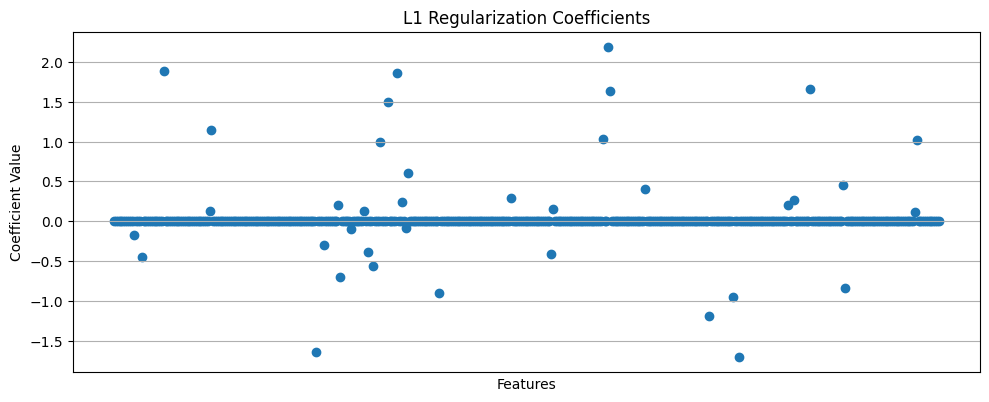

In [ ]:
l1_model = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
cv_scores = cross_val_score(l1_model, X_train, y_train, cv=5)

print(cv_scores)

l1_model.fit(X_train, y_train)

coefficients = l1_model.coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
plt.scatter(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization Coefficients')
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.show()

In [ ]:
print('Features with nonzero coefs:')
list(filter(lambda x : x[1] != 0, zip(X.columns, l1_model.coef_[0])))

Features with nonzero coefs:


[('mean_speed_in_air1', -0.17515980472781223),
 ('pressure_mean1', -0.4398020412296589),
 ('mean_jerk_in_air2', 1.8866987929462309),
 ('pressure_var3', 0.131145504357439),
 ('total_time3', 1.1500593563379484),
 ('gmrt_in_air7', -1.6357369440664127),
 ('mean_acc_in_air7', -0.30300666101896656),
 ('paper_time7', 0.20773110452005125),
 ('pressure_mean7', -0.6989153722339578),
 ('gmrt_on_paper8', -0.3130926842359364),
 ('mean_jerk_on_paper8', 0.13026030492641563),
 ('mean_speed_on_paper8', -0.15963664656145646),
 ('pressure_mean8', -0.5734849058345213),
 ('disp_index9', 0.9928674920407768),
 ('max_y_extension9', 1.4948443033132575),
 ('mean_jerk_on_paper9', 1.865232907791373),
 ('num_of_pendown9', 0.24739267840773424),
 ('pressure_mean9', -0.09053156123765442),
 ('pressure_var9', 0.6086662114070918),
 ('pressure_mean10', -0.9080846101339628),
 ('air_time13', 0.29321756466429055),
 ('max_x_extension14', -0.41015526451104256),
 ('max_y_extension14', 0.15297091249849606),
 ('paper_time15', 1.

     True  Predicted  Model Probability
54      1          1           0.981951
147     0          0           0.101367
63      1          0           0.485133
55      1          1           0.969655
122     0          0           0.060217
Training Accuracy: 0.9712230215827338
Testing Accuracy: 0.8285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.87      0.76      0.81        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



Text(0.5, 1.0, 'L1 Regularization Testing Data Confusion Matrix')

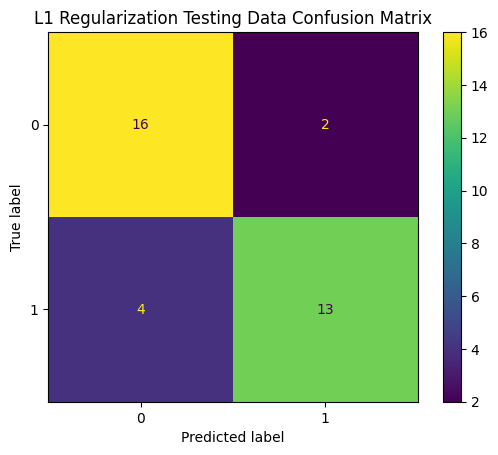

In [ ]:
#Make predictions
y_pred = l1_model.predict(X_test)
y_pred_proba = l1_model.predict_proba(X_test)[:, 1]

# Compare True results vs Prediction results
compare_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Model Probability': y_pred_proba})
print(compare_df.head())


print("Training Accuracy: " + str(l1_model.score(X_train,y_train)))
print("Testing Accuracy: " + str(l1_model.score(X_test,y_test)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_disp.plot()
plt.title('L1 Regularization Testing Data Confusion Matrix')

## L2 (Ridge) Regularization

[0.78571429 0.82142857 0.89285714 0.85714286 0.88888889]


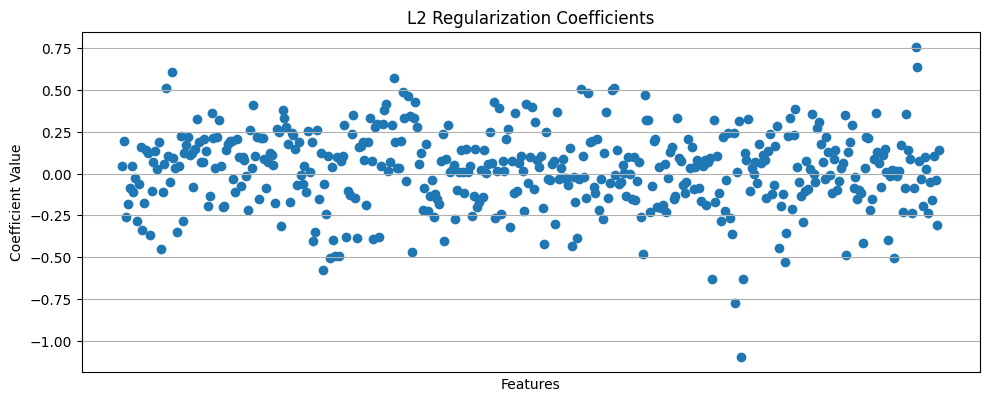

In [ ]:
l2_model = LogisticRegression(penalty="l2", max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
cv_scores = cross_val_score(l2_model, X_train, y_train, cv=5)

print(cv_scores)

l2_model.fit(X_train, y_train)

coefficients = l2_model.coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
plt.scatter(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('L2 Regularization Coefficients')
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.show()

     True  Predicted  Model Probability
54      1          1           0.987741
147     0          0           0.053956
63      1          1           0.538343
55      1          1           0.991220
122     0          0           0.008202
Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.88      0.82      0.85        17

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



Text(0.5, 1.0, 'L2 Regularization Testing Data Confusion Matrix')

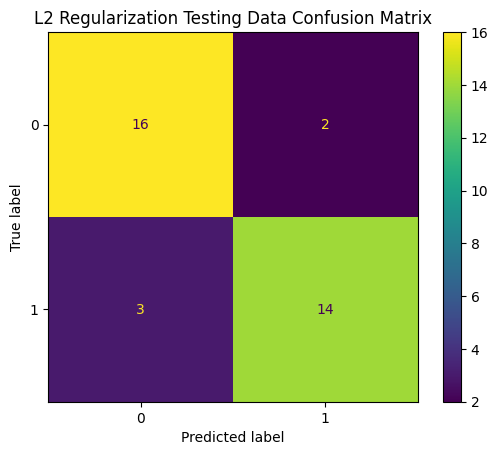

In [ ]:
#Make predictions
y_pred = l2_model.predict(X_test)
y_pred_proba = l2_model.predict_proba(X_test)[:, 1]

# Compare True results vs Prediction results
compare_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Model Probability': y_pred_proba})
print(compare_df.head())


print("Training Accuracy: " + str(l2_model.score(X_train,y_train)))
print("Testing Accuracy: " + str(l2_model.score(X_test,y_test)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_disp.plot()
plt.title('L2 Regularization Testing Data Confusion Matrix')

## Mixed (Elastic Net) Regularization

In [ ]:
cv_avgs = {}
for r in range(0,20):
  en_model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=r/20, max_iter=1000)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
  cv_scores = cross_val_score(en_model, X_train, y_train, cv=5)

  cv_avgs[r] = cv_scores.mean()
print(cv_avgs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{0: 0.8346560846560847, 1: 0.8346560846560847, 2: 0.8420634920634921, 3: 0.8492063492063492, 4: 0.8277777777777778, 5: 0.8277777777777778, 6: 0.8206349206349206, 7: 0.8203703703703704, 8: 0.8132275132275131, 9: 0.8132275132275131, 10: 0.8206349206349206, 11: 0.8206349206349206, 12: 0.8277777777777778, 13: 0.8277777777777778, 14: 0.8132275132275131, 15: 0.806084656084656, 16: 0.806084656084656, 17: 0.791798941798942, 18: 0.791798941798942, 19: 0.7846560846560846}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Best cv score was at l1_ratio=0.15
en_model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.15, max_iter=1000)

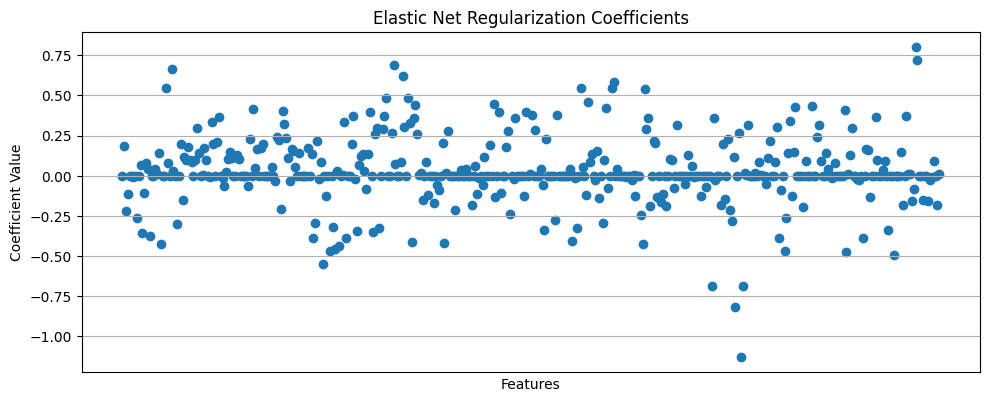

In [ ]:
en_model.fit(X_train, y_train)

coefficients = en_model.coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
plt.scatter(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Regularization Coefficients')
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.show()

     True  Predicted  Model Probability
54      1          1           0.981527
147     0          0           0.056258
63      1          1           0.566419
55      1          1           0.986692
122     0          0           0.012444
Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.88      0.82      0.85        17

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



Text(0.5, 1.0, 'Elastic Net Regularization Testing Data Confusion Matrix')

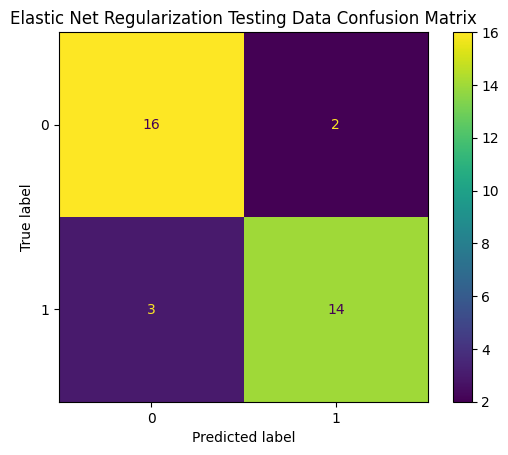

In [ ]:
#Make predictions
y_pred = en_model.predict(X_test)
y_pred_proba = en_model.predict_proba(X_test)[:, 1]

# Compare True results vs Prediction results
compare_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Model Probability': y_pred_proba})
print(compare_df.head())


print("Training Accuracy: " + str(en_model.score(X_train,y_train)))
print("Testing Accuracy: " + str(en_model.score(X_test,y_test)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_disp.plot()
plt.title('Elastic Net Regularization Testing Data Confusion Matrix')